# Part II - Factors that affect loan outcome, loan amount, and interest rate in ProsperLoan Data 
## by Bello Abdulkabir


## Investigation Overview
>The purpose of this investigation is to look for patterns or trends that relates to the  loan outcome, loan amount or interest rate in the ProsperLoan dataset. My main focus will be on the distribution of the original loan amount, interest rate, employment status of the loanee, investors, home ownership and loan term.
 

## Dataset Overview

> The dataset consists of 113,937 loanee information with 81 variables. information of loanees who selected **not-avaliable** or **other** as their Employment status were removed due to the invalidity of their answers and i also wanted to categorise the `Employment Status` column before performing my analysis on it. A smaller subset of 700 random samples of the dataframe was created so as to counter the issue of overplotting in my visualization and to increase visual readability of my plot.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Distribution of Loan Price
> The highest distribution of loan amount falls around 10,000 15,000 and 4000 with the most reoccuring of them all being around the 3,000-4,500 mark.


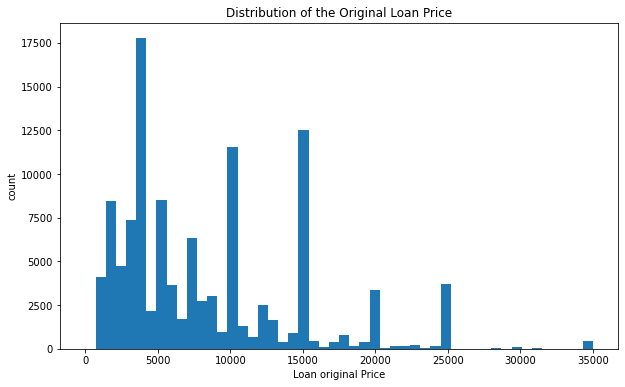

In [6]:
plt.figure(figsize=(10,6))
bin_edges = np.arange(0, df.LoanOriginalAmount.max()+500, 700)
plt.hist(data=df, x='LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan original Price')
plt.ylabel('count')
plt.title('Distribution of the Original Loan Price');

## Relationship Between number of investors and loan price

> There is observed  to be a strong correlation with the loan original amount and the number of investors that sponsored the loan. This brings me to the assumption that a sinlge investor will find it financially daunting to loan out a huge amount of money (in the range of 25,000 - 35,000 dollars). Also, in the heatmap depicted we can see that most of the loanees in the dataset borrowed a sum ranging from 1,000 - 4,500 dollars.

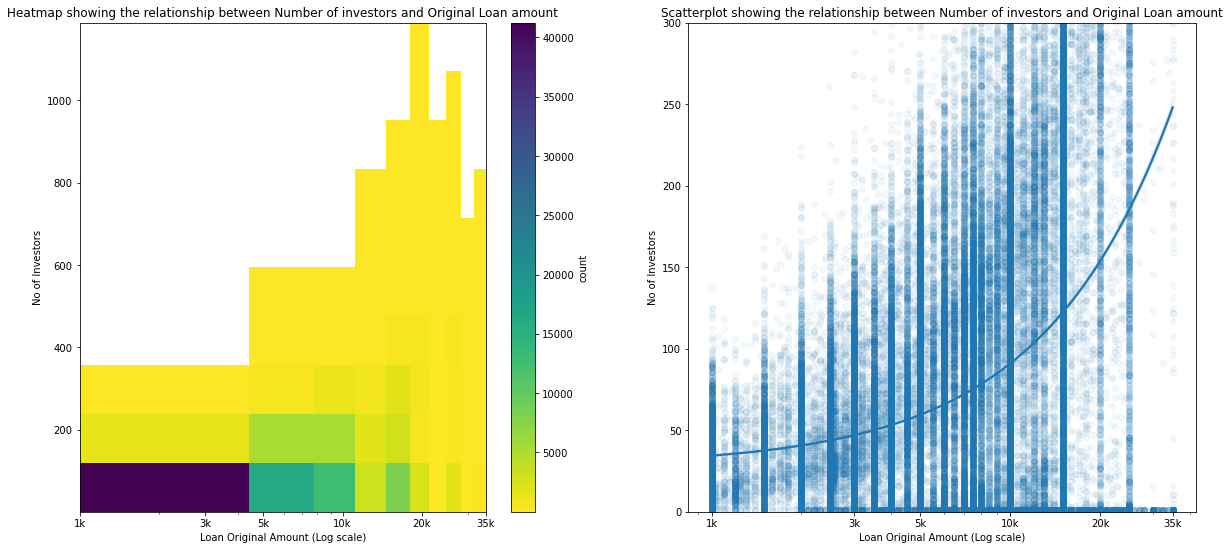

In [19]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.hist2d(data=df, x='LoanOriginalAmount', y='Investors', cmin=1, cmap='viridis_r')
bar_color = plt.colorbar()
bar_color.set_label('count')
plt.xscale('log')
plt.xticks([1e3,3e3,5e3,1e4,2e4,35e3], ['1k','3k','5k','10k','20k','35k'])
plt.xlabel('Loan Original Amount (Log scale)')
plt.ylabel('No of Investors')
plt.title('Heatmap showing the relationship between Number of investors and Original Loan amount')
plt.subplot(1,2,2)
sns.regplot(data=df, x='LoanOriginalAmount', y='Investors', scatter_kws={'alpha':1/20})
plt.xscale('log')
plt.xticks([1e3,3e3,5e3,1e4,2e4,35e3], ['1k','3k','5k','10k','20k','35k'])
plt.ylim(0,300)
plt.xlabel('Loan Original Amount (Log scale)')
plt.ylabel('No of Investors')
plt.title('Scatterplot showing the relationship between Number of investors and Original Loan amount');

## Loan price by Employment Status and Home Ownership

> It's seen clearly that loanees who own a home borrow larger amounts than those who do not. Also, one can depict from the data that generally, loanees who are employed borrow larger amounts of loan than others and there's a positive rise in the amount of loan borrowed from left to right (from **Not-Employed** up to **Employed**) till it gets to loanees who are retired from the workforce.

In [8]:
# i only want loanees who specified their employment status (that is, loanees who didn't classify their employment status under "not avaliable" or "other")
df_sub = df.loc[~df.EmploymentStatus.isin(['Not available', 'Other'])]
df_sub.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [9]:
# then in the newly created dataframe i'll categorize the EmploymentStatus column and change its dataframe to categorical datatype
employment_cat = ['Not employed', 'Part-time', 'Full-time', 'Self-employed', 'Employed', 'Retired']
ord_cat = pd.api.types.CategoricalDtype (categories = employment_cat, ordered = True) 
df_sub.EmploymentStatus = df_sub.EmploymentStatus.astype(ord_cat,)

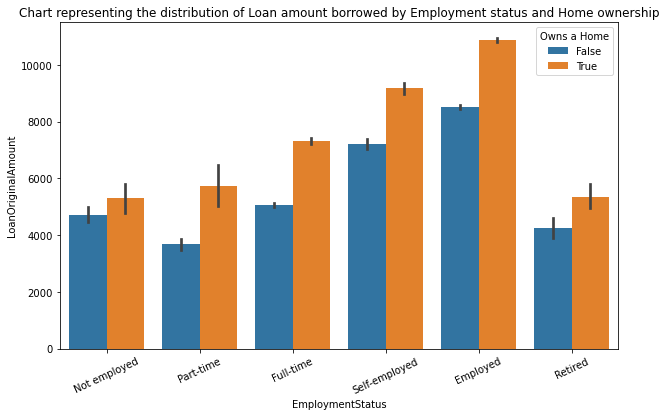

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_sub, x='EmploymentStatus', y ='LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.xticks(rotation=25)
plt.legend(title='Owns a Home')
plt.title('Chart representing the distribution of Loan amount borrowed by Employment status and Home ownership');

## Loan Term by Interest Rate and Returns

> It seems to be the case that the higher the loan duration, the higher the estimated return and interest rate. As seen in the plot we have the months with the hghest loan term being slighty above the months with a loan duration of 30-36 months. Although, some outliers can be seen having a shorter loan duration that falls within that range (of 30-36 months) and still having a high interest rate than the 60 months loan period.
the black dots in the plot represents the distribution of loan periods between 10-20 months. Not only can we see that the lower loan duration tend to attract lower interest rate and estimated return but we can also see that the distribution of loanees who have a very short loan duration are small in number as we can easily count the amount of black dots in the scatterplot above.

In [11]:
# to avoid overplotting i will be creating a smaller subset of data to work with
np.random.seed(1)
smaller_df_subset = df.sample(700)

Text(0.5, 1.0, 'Distribution of Loan Term with interest rate and Returns')

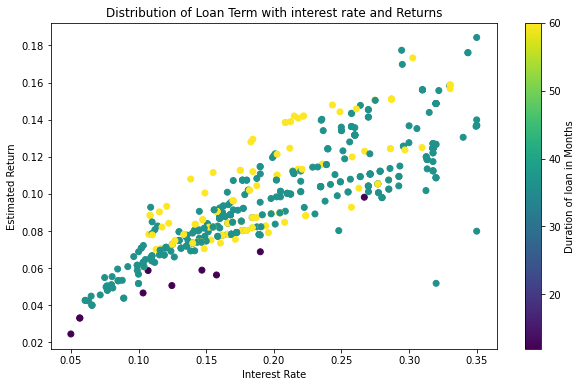

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(data = smaller_df_subset, x='BorrowerRate', y='EstimatedReturn', c='Term')
cbar = plt.colorbar()
cbar.set_label('Duration of loan in Months')
plt.xlabel('Interest Rate')
plt.ylabel('Estimated Return')
plt.title('Distribution of Loan Term with interest rate and Returns');

In [18]:
!jupyter nbconvert Part_II_ProsperLoan_Dataset_Explanation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_ProsperLoan_Dataset_Explanation.ipynb to slides
[NbConvertApp] Writing 1194617 bytes to Part_II_ProsperLoan_Dataset_Explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(note